<a href="https://colab.research.google.com/github/deNzik3/Data-Analytics/blob/main/mini_projects/WALLMART_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#### Problem:
####There are many seasons that sales are significantly higher or lower than averages. If the company does not know about these seasons, it can lose too much money. 
#### Questions:
№ 1: At what time of the year were there the most sales + average number of products by date?

№ 2: What is the number of orders by state + which city has the largest number of orders?

№ 3: What is the average revenue by state?

№ 4: What is the most favorite product / category by state?

№ 5: Who was the best seller by profit?

№ 6: For what number of days is the product delivered?

#### My plan:

1. Understanding, Cleaning data

2. simple EDA + answering on questions



In [1]:
#importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

!pip install pandasql
from pandasql import sqldf

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Preparing metadata (setup.py) ... done
  Created wheel for pandasql: filename=pandasql-0.7.3-py3-none-any.whl size=26784 sha256=56c1c0506dc43811cf92eae36b518ee8580eb8d931c0be72bedd20fc28eabc87
  Stored in directory: /root/.cache/pip/wheels/63/e8/ec/75b1df467ecf57b6ececb32cb16f4e86697cbfe55cb0c51f07
Successfully built pandasql


# Understanding, Cleaning data

In [2]:
df = pd.read_csv('/content/Walmart.csv')
df.head()

,Order ID,Order Date,Ship Date,Customer Name,Country,City,State,Category,Product Name,Sales,Quantity,Profit
0,CA-2013-138688,13-06-2013,17-06-2013,Darrin Van Huff,United States,Los Angeles,California,Labels,Self-Adhesive Address Labels for Typewriters b...,14.62,2.0,6.87
1,CA-2011-115812,09-06-2011,14-06-2011,Brosina Hoffman,United States,Los Angeles,California,Furnishings,Eldon Expressions Wood and Plastic Desk Access...,48.86,7.0,14.17
2,CA-2011-115812,09-06-2011,14-06-2011,Brosina Hoffman,United States,Los Angeles,California,Art,Newell 322,7.28,4.0,1.97
3,CA-2011-115812,09-06-2011,14-06-2011,Brosina Hoffman,United States,Los Angeles,California,Phones,Mitel 5320 IP Phone VoIP phone,907.15,4.0,90.72
4,CA-2011-115812,09-06-2011,14-06-2011,Brosina Hoffman,United States,Los Angeles,California,Binders,DXL Angle-View Binders with Locking Rings by S...,18.50,3.0,5.78


Let's create a summary function!

In [3]:
def summary(df):
  print(f'DATA SHAPE: {df.shape}')
  summ = pd.DataFrame(df.dtypes, columns=['data type'])
  summ['#missing'] = df.isnull().sum().values * 100
  summ['%missing'] = df.isnull().sum().values / len(df)
  summ['#unique'] = df.nunique().values
  summ['#duplicates'] = df.duplicated().count()
  desc = pd.DataFrame(df.describe(include='all').transpose())
  summ['min'] = desc['min'].values
  summ['max'] = desc['max'].values
  summ['first value'] = df.loc[0].values
  summ['second value'] = df.loc[1].values
  summ['third value'] = df.loc[2].values

  return summ

In [4]:
summary(df)

DATA SHAPE: (3203, 12)


,data type,#missing,%missing,#unique,#duplicates,min,max,first value,second value,third value
Order ID,object,0,0.0,1611,3203,NaN,NaN,CA-2013-138688,CA-2011-115812,CA-2011-115812
Order Date,object,0,0.0,845,3203,NaN,NaN,13-06-2013,09-06-2011,09-06-2011
Ship Date,object,0,0.0,911,3203,NaN,NaN,17-06-2013,14-06-2011,14-06-2011
Customer Name,object,0,0.0,686,3203,NaN,NaN,Darrin Van Huff,Brosina Hoffman,Brosina Hoffman
Country,object,0,0.0,1,3203,NaN,NaN,United States,United States,United States
City,object,0,0.0,169,3203,NaN,NaN,Los Angeles,Los Angeles,Los Angeles
State,object,0,0.0,11,3203,NaN,NaN,California,California,California
Category,object,0,0.0,17,3203,NaN,NaN,Labels,Furnishings,Art
Product Name,object,0,0.0,1494,3203,NaN,NaN,Self-Adhesive Address Labels for Typewriters b...,Eldon Expressions Wood and Plastic Desk Access...,Newell 322
Sales,float64,0,0.0,2295,3203,0.99,13999.96,14.62,48.86,7.28


In [5]:
df.columns = df.columns.str.replace(' ','_').str.lower()


In [6]:
df.columns

Index(['order_id', 'order_date', 'ship_date', 'customer_name', 'country',
       'city', 'state', 'category', 'product_name', 'sales', 'quantity',
       'profit'],
      dtype='object')

In [7]:
df.head()

,order_id,order_date,ship_date,customer_name,country,city,state,category,product_name,sales,quantity,profit
0,CA-2013-138688,13-06-2013,17-06-2013,Darrin Van Huff,United States,Los Angeles,California,Labels,Self-Adhesive Address Labels for Typewriters b...,14.62,2.0,6.87
1,CA-2011-115812,09-06-2011,14-06-2011,Brosina Hoffman,United States,Los Angeles,California,Furnishings,Eldon Expressions Wood and Plastic Desk Access...,48.86,7.0,14.17
2,CA-2011-115812,09-06-2011,14-06-2011,Brosina Hoffman,United States,Los Angeles,California,Art,Newell 322,7.28,4.0,1.97
3,CA-2011-115812,09-06-2011,14-06-2011,Brosina Hoffman,United States,Los Angeles,California,Phones,Mitel 5320 IP Phone VoIP phone,907.15,4.0,90.72
4,CA-2011-115812,09-06-2011,14-06-2011,Brosina Hoffman,United States,Los Angeles,California,Binders,DXL Angle-View Binders with Locking Rings by S...,18.50,3.0,5.78


In [8]:
df['month_order'] = df['order_date'].str[3:5].astype('int64')

In [9]:
df[df.isnull().any(axis = 1)]

,order_id,order_date,ship_date,customer_name,country,city,state,category,product_name,sales,quantity,profit,month_order


In [10]:
df['order_date'] = pd.to_datetime(df['order_date'])
df['ship_date'] = pd.to_datetime(df['ship_date'])

/usr/local/lib/python3.9/dist-packages/pandas/core/tools/datetimes.py:1047: UserWarning: Parsing '13-06-2013' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  cache_array = _maybe_cache(arg, format, cache, convert_listlike)
/usr/local/lib/python3.9/dist-packages/pandas/core/tools/datetimes.py:1047: UserWarning: Parsing '13-05-2011' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  cache_array = _maybe_cache(arg, format, cache, convert_listlike)
/usr/local/lib/python3.9/dist-packages/pandas/core/tools/datetimes.py:1047: UserWarning: Parsing '27-08-2011' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  cache_array = _maybe_cache(arg, format, cache, convert_listlike)
/usr/local/lib/python3.9/dist-packages/pandas/core/tools/datetimes.py:1047: UserWarning: Parsing '25-09-2012' in DD/MM/YYYY format. Provide format or specify infer_datetime

# EDA + answering on questions

In [11]:
df.head()

/usr/local/lib/python3.9/dist-packages/pandas/core/tools/datetimes.py:1047: UserWarning: Parsing '15-05-2012' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  cache_array = _maybe_cache(arg, format, cache, convert_listlike)
/usr/local/lib/python3.9/dist-packages/pandas/core/tools/datetimes.py:1047: UserWarning: Parsing '20-05-2011' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  cache_array = _maybe_cache(arg, format, cache, convert_listlike)
/usr/local/lib/python3.9/dist-packages/pandas/core/tools/datetimes.py:1047: UserWarning: Parsing '19-09-2011' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  cache_array = _maybe_cache(arg, format, cache, convert_listlike)
/usr/local/lib/python3.9/dist-packages/pandas/core/tools/datetimes.py:1047: UserWarning: Parsing '27-04-2014' in DD/MM/YYYY format. Provide format or specify infer_datetime

,order_id,order_date,ship_date,customer_name,country,city,state,category,product_name,sales,quantity,profit,month_order
0,CA-2013-138688,2013-06-13,2013-06-17,Darrin Van Huff,United States,Los Angeles,California,Labels,Self-Adhesive Address Labels for Typewriters b...,14.62,2.0,6.87,6
1,CA-2011-115812,2011-09-06,2011-06-14,Brosina Hoffman,United States,Los Angeles,California,Furnishings,Eldon Expressions Wood and Plastic Desk Access...,48.86,7.0,14.17,6
2,CA-2011-115812,2011-09-06,2011-06-14,Brosina Hoffman,United States,Los Angeles,California,Art,Newell 322,7.28,4.0,1.97,6
3,CA-2011-115812,2011-09-06,2011-06-14,Brosina Hoffman,United States,Los Angeles,California,Phones,Mitel 5320 IP Phone VoIP phone,907.15,4.0,90.72,6
4,CA-2011-115812,2011-09-06,2011-06-14,Brosina Hoffman,United States,Los Angeles,California,Binders,DXL Angle-View Binders with Locking Rings by S...,18.50,3.0,5.78,6


In [12]:
df['country'].value_counts()

United States    3203
Name: country, dtype: int64

We can see, that there is only information about USA

Text(0.5, 1.0, 'Profit dist')

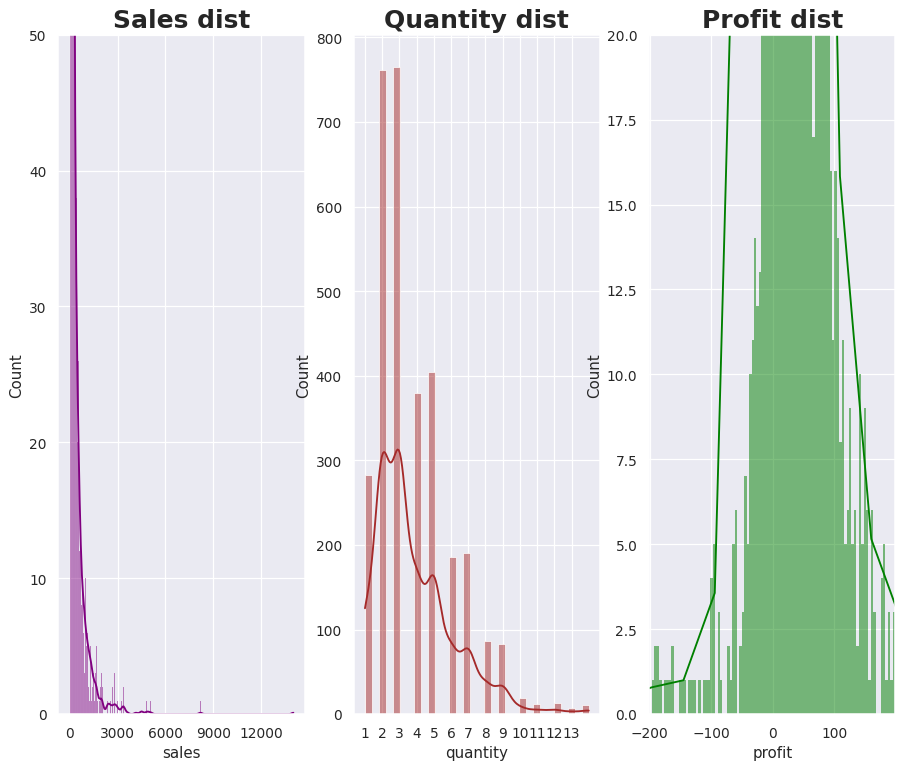

In [13]:
sns.set(style = 'darkgrid')

fig, axes = plt.subplots(1,3,figsize = (12,10),dpi = 90)

sns.histplot(ax = axes[0], data = df, x = 'sales',color = 'purple',kde = True)
axes[0].set_ylim(np.arange(0,51,50))
axes[0].set_xticks(np.arange(0,max(df['sales']),3000))
axes[0].set_title('Sales dist',weight = 'heavy',size = 20)


sns.histplot(ax = axes[1], data = df, x ='quantity',color = 'brown',kde = True)
axes[1].set_xticks(np.arange(1,max(df['quantity'])))
axes[1].set_title('Quantity dist',weight = 'heavy',size = 20)


sns.histplot(ax = axes[2], data = df, x ='profit',color = 'green',kde = True)
axes[2].set_ylim(np.arange(0,21,20))
axes[2].set_xlim(np.arange(-201,201,400))
axes[2].set_title('Profit dist',weight = 'heavy',size = 20)

**1st** graph: as we can see, the main amount of sales is somewhere between 0 and 3000, there are also small outliers that the amount of sales is > 9000

**2nd** graph: It is clearly seen here that two pieces of some kind of product are bought most of all

**3rd** graph: The graph shows that the main profit is concentrated in the range of -100 and 100 

#### № 1: At what time of the year were there the most sales + average number of products by date?

In [14]:
df.head()

,order_id,order_date,ship_date,customer_name,country,city,state,category,product_name,sales,quantity,profit,month_order
0,CA-2013-138688,2013-06-13,2013-06-17,Darrin Van Huff,United States,Los Angeles,California,Labels,Self-Adhesive Address Labels for Typewriters b...,14.62,2.0,6.87,6
1,CA-2011-115812,2011-09-06,2011-06-14,Brosina Hoffman,United States,Los Angeles,California,Furnishings,Eldon Expressions Wood and Plastic Desk Access...,48.86,7.0,14.17,6
2,CA-2011-115812,2011-09-06,2011-06-14,Brosina Hoffman,United States,Los Angeles,California,Art,Newell 322,7.28,4.0,1.97,6
3,CA-2011-115812,2011-09-06,2011-06-14,Brosina Hoffman,United States,Los Angeles,California,Phones,Mitel 5320 IP Phone VoIP phone,907.15,4.0,90.72,6
4,CA-2011-115812,2011-09-06,2011-06-14,Brosina Hoffman,United States,Los Angeles,California,Binders,DXL Angle-View Binders with Locking Rings by S...,18.50,3.0,5.78,6


I need to create a "season" columns, let's go!

In [15]:
def season(df):
  if df >= 1 and df <= 2 or df == 12:
    return 'winter'
  elif df >= 3 and df <= 5:
    return 'spring'
  elif df >= 6 and df <= 8:
    return 'summer'
  else:
    return 'autumn'
    

In [16]:
df['season'] = df['month_order'].apply(season)

In [17]:
df.head()

,order_id,order_date,ship_date,customer_name,country,city,state,category,product_name,sales,quantity,profit,month_order,season
0,CA-2013-138688,2013-06-13,2013-06-17,Darrin Van Huff,United States,Los Angeles,California,Labels,Self-Adhesive Address Labels for Typewriters b...,14.62,2.0,6.87,6,summer
1,CA-2011-115812,2011-09-06,2011-06-14,Brosina Hoffman,United States,Los Angeles,California,Furnishings,Eldon Expressions Wood and Plastic Desk Access...,48.86,7.0,14.17,6,summer
2,CA-2011-115812,2011-09-06,2011-06-14,Brosina Hoffman,United States,Los Angeles,California,Art,Newell 322,7.28,4.0,1.97,6,summer
3,CA-2011-115812,2011-09-06,2011-06-14,Brosina Hoffman,United States,Los Angeles,California,Phones,Mitel 5320 IP Phone VoIP phone,907.15,4.0,90.72,6,summer
4,CA-2011-115812,2011-09-06,2011-06-14,Brosina Hoffman,United States,Los Angeles,California,Binders,DXL Angle-View Binders with Locking Rings by S...,18.50,3.0,5.78,6,summer


In [18]:
data = df.groupby(by = 'season', as_index = False)['sales'].sum() \
          .sort_values(by = 'sales',ascending = False)
data

,season,sales
0,autumn,232124.06
2,summer,175900.81
1,spring,160311.21
3,winter,157121.85


<Axes: title={'center': 'Sales by season'}, xlabel='sales', ylabel='season'>

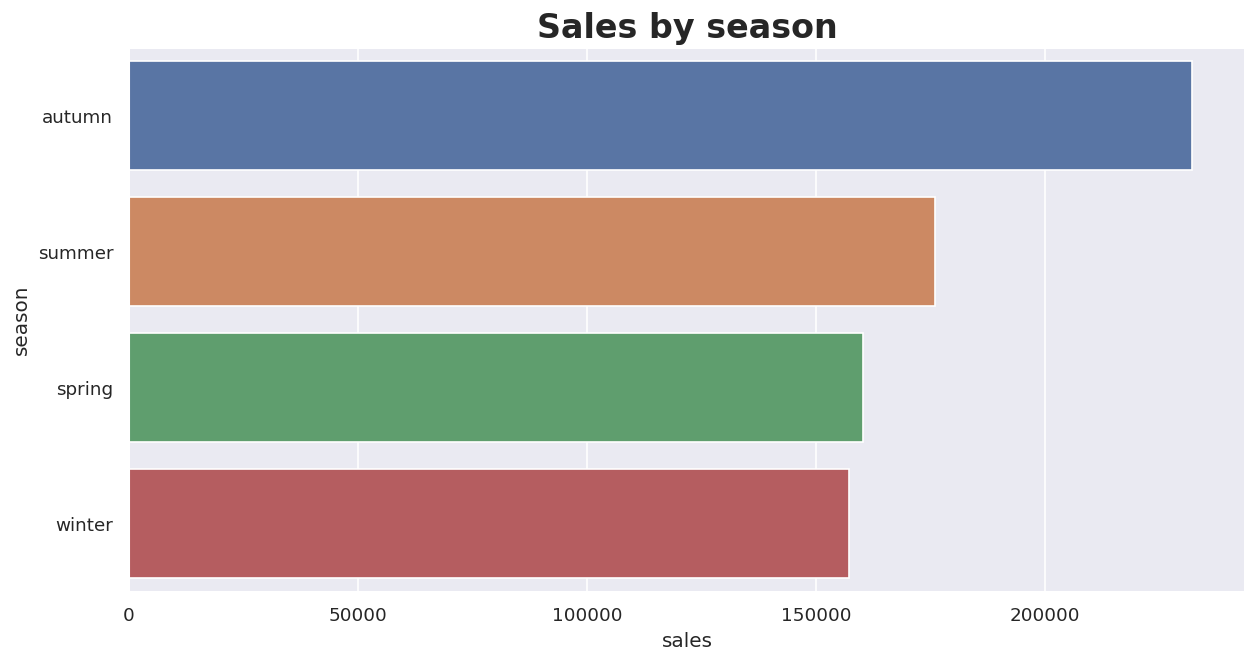

In [19]:
plt.figure(figsize = (12,6),dpi = 120)

plt.title('Sales by season', weight = 'heavy',size = 20)

sns.barplot(data = data, x = 'sales', y = 'season')


The most productive season was autumn

In [20]:
df['year_order'] = df['order_date'].astype('str') \
                                  .str[0:4] \
                                  .astype('int64')

Let's compare the data by year

In [21]:
data2014 = df[df['year_order'] == 2014].groupby(by = 'month_order',as_index = False)['sales'] \
                                        .sum() 
                                        
data2013 = df[df['year_order'] == 2013].groupby(by = 'month_order',as_index = False)['sales'] \
                                        .sum() 

data2012 = df[df['year_order'] == 2012].groupby(by = 'month_order',as_index = False)['sales'] \
                                        .sum() 
                                                                                
data2011 = df[df['year_order'] == 2011].groupby(by = 'month_order',as_index = False)['sales'] \
                                        .sum() 
                                                                                                                 
                             

(0.0, 33000.0)

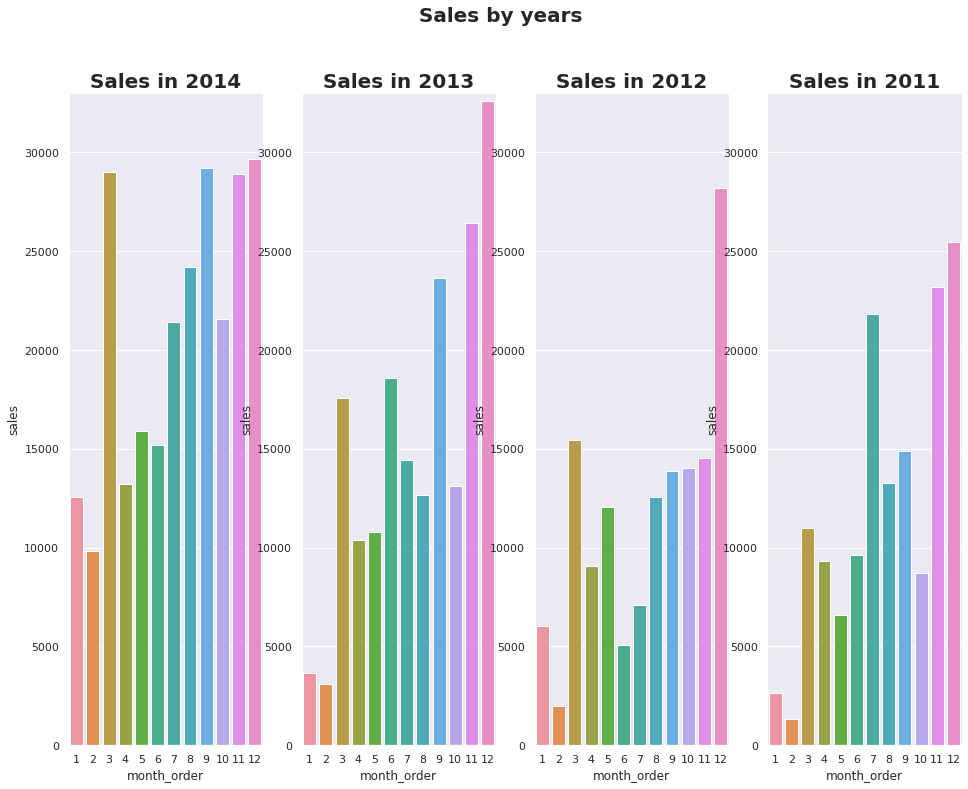

In [22]:
fig, axes = plt.subplots(1,4,figsize = (16,12))

fig.suptitle('Sales by years', weight = 'bold',size = 20)

sns.barplot(ax = axes[0], data = data2014, x = 'month_order', y = 'sales')
axes[0].set_title('Sales in 2014', weight = 'heavy', size = 20)
axes[0].set_ylim(0,33000)


sns.barplot(ax = axes[1], data = data2013, x = 'month_order', y = 'sales')
axes[1].set_title('Sales in 2013', weight = 'heavy', size = 20)
axes[1].set_ylim(0,33000)

sns.barplot(ax = axes[2], data = data2012, x = 'month_order', y = 'sales')
axes[2].set_title('Sales in 2012', weight = 'heavy', size = 20)
axes[2].set_ylim(0,33000)


sns.barplot(ax = axes[3], data = data2011, x = 'month_order', y = 'sales')
axes[3].set_title('Sales in 2011', weight = 'heavy', size = 20)
axes[3].set_ylim(0,33000)


Let's take only 2014 year

In [23]:
sub = df[df['year_order'] == 2014].copy()

In [24]:
sub = sub.reset_index(drop = True)

In [25]:
sub.head()

,order_id,order_date,ship_date,customer_name,country,city,state,category,product_name,sales,quantity,profit,month_order,season,year_order
0,US-2014-109484,2014-07-11,2014-11-13,Roger Barcio,United States,Portland,Oregon,Binders,Flexible Leather- Look Classic Collection Ring...,5.68,1.0,-3.79,11,autumn,2014
1,CA-2014-157833,2014-06-18,2014-06-21,Katherine Ducich,United States,San Francisco,California,Binders,Trimflex Flexible Post Binders,51.31,3.0,17.96,6,summer,2014
2,US-2014-107272,2014-06-11,2014-11-13,Troy Staebel,United States,Phoenix,Arizona,Binders,"Avery Durable Slant Ring Binders, No Labels",2.39,2.0,-1.83,11,autumn,2014
3,US-2014-107272,2014-06-11,2014-11-13,Troy Staebel,United States,Phoenix,Arizona,Storage,"Trav-L-File Heavy-Duty Shuttle II, Black",243.99,7.0,30.50,11,autumn,2014
4,CA-2014-106180,2014-09-19,2014-09-24,Sally Hughsby,United States,San Francisco,California,Art,Newell 343,8.82,3.0,2.38,9,autumn,2014


In [26]:
data = sub.groupby(by = 'month_order', as_index = False)['quantity'].mean()

<Axes: title={'center': 'The average quantity ordered by month in 2014'}, xlabel='month_order', ylabel='quantity'>

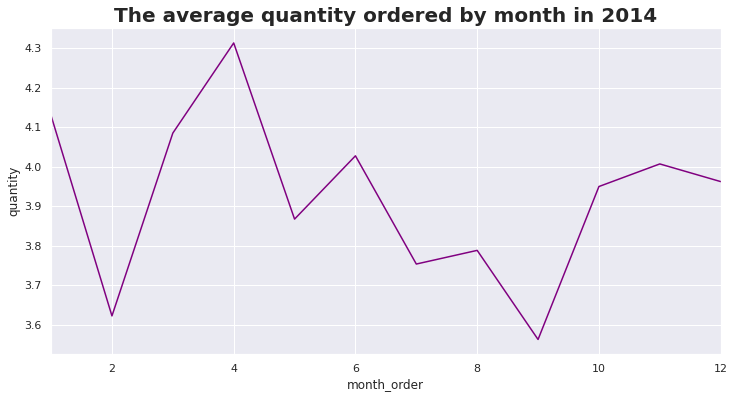

In [27]:
plt.figure(figsize = (12,6))
plt.title('The average quantity ordered by month in 2014', weight = 'heavy', size = 20)

plt.xlim(1,12)

sns.lineplot(data = data, x = 'month_order', y = 'quantity', color = 'purple')


# № 2: What is the number of orders by state + which city has the largest number of orders?






I will continue to work only with 2014 year

In [28]:
sub.head()

,order_id,order_date,ship_date,customer_name,country,city,state,category,product_name,sales,quantity,profit,month_order,season,year_order
0,US-2014-109484,2014-07-11,2014-11-13,Roger Barcio,United States,Portland,Oregon,Binders,Flexible Leather- Look Classic Collection Ring...,5.68,1.0,-3.79,11,autumn,2014
1,CA-2014-157833,2014-06-18,2014-06-21,Katherine Ducich,United States,San Francisco,California,Binders,Trimflex Flexible Post Binders,51.31,3.0,17.96,6,summer,2014
2,US-2014-107272,2014-06-11,2014-11-13,Troy Staebel,United States,Phoenix,Arizona,Binders,"Avery Durable Slant Ring Binders, No Labels",2.39,2.0,-1.83,11,autumn,2014
3,US-2014-107272,2014-06-11,2014-11-13,Troy Staebel,United States,Phoenix,Arizona,Storage,"Trav-L-File Heavy-Duty Shuttle II, Black",243.99,7.0,30.50,11,autumn,2014
4,CA-2014-106180,2014-09-19,2014-09-24,Sally Hughsby,United States,San Francisco,California,Art,Newell 343,8.82,3.0,2.38,9,autumn,2014


In [29]:
data = sub.groupby(by = 'state', as_index = False)['order_id'].count().sort_values(by = 'order_id', ascending = False)
data

,state,order_id
1,California,665
9,Washington,215
0,Arizona,70
2,Colorado,61
7,Oregon,30
6,New Mexico,22
8,Utah,15
3,Idaho,8
5,Nevada,8
4,Montana,5


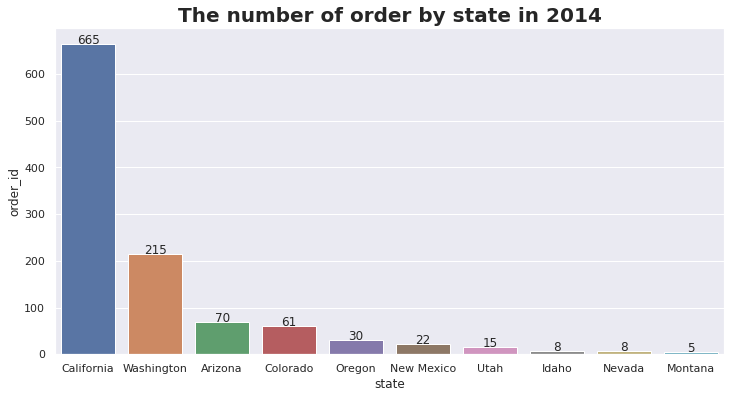

In [30]:
plt.figure(figsize = (12,6))
plt.title('The number of order by state in 2014', weight ='heavy', size = 20)


sns.barplot(data = data, x = 'state', y = 'order_id')



for i,v in enumerate(data['order_id']):
  plt.text(i,v,str(v), ha = 'center')


which city has the largest number of orders?

In [31]:
sub.groupby(by = 'city', as_index = False)['order_id'].count() \
  .sort_values(by = 'order_id',ascending = False) \
  .head(3) \
  .rename(columns = {'order_id':'count'})

,city,count
52,Los Angeles,210
89,San Francisco,191
96,Seattle,182


# № 3: What is the average revenue by state?

In [32]:
sub.groupby(by = 'state', as_index = False)['profit'].mean() \
   .sort_values(by = 'profit',ascending = False)

,state,profit
4,Montana,293.184000
9,Washington,80.264465
5,Nevada,45.093750
1,California,44.214722
6,New Mexico,37.609091
8,Utah,31.812000
3,Idaho,24.876250
7,Oregon,-12.570667
0,Arizona,-18.228286
2,Colorado,-72.718525


In [33]:
data = sub.groupby(by = 'order_date',as_index = False)['profit'].mean()
data.head()

,order_date,profit
0,2014-01-01,22.917500
1,2014-01-04,8.020000
2,2014-01-05,25.662000
3,2014-01-07,43.713333
4,2014-01-08,13.365000


<Axes: title={'center': 'The average profit by date in 2014'}, xlabel='order_date', ylabel='profit'>

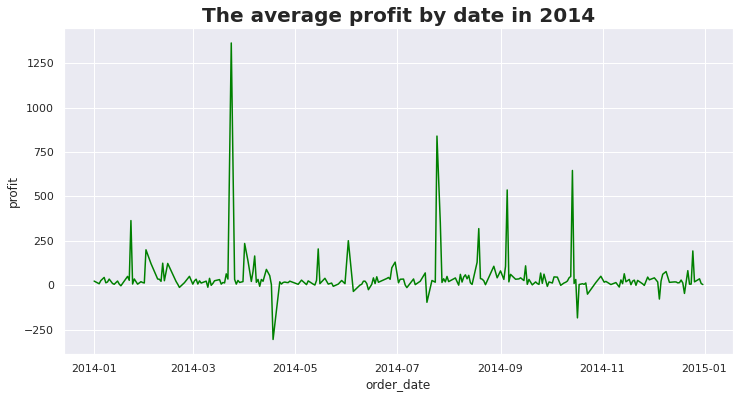

In [34]:
plt.figure(figsize = (12,6))

plt.title('The average profit by date in 2014', size = 20, weight = 'heavy')

sns.lineplot(data = data, x = 'order_date', y = 'profit',color = 'green')




In [35]:
#let's find out when was the max / min profit

sub[sub['profit'] == df['profit'].max()]




,order_id,order_date,ship_date,customer_name,country,city,state,category,product_name,sales,quantity,profit,month_order,season,year_order
914,CA-2014-140151,2014-03-24,2014-03-26,Raymond Buch,United States,Seattle,Washington,Copiers,Canon imageCLASS 2200 Advanced Copier,13999.96,4.0,6719.98,3,spring,2014


In [36]:
sub[sub['profit'] == df['profit'].min()]

,order_id,order_date,ship_date,customer_name,country,city,state,category,product_name,sales,quantity,profit,month_order,season,year_order
313,CA-2014-134845,2014-04-18,2014-04-24,Sharelle Roach,United States,Louisville,Colorado,Machines,Lexmark MX611dhe Monochrome Laser Printer,2549.99,5.0,-3399.98,4,spring,2014


# № 4: What is the most favorite product / category by state?

In [37]:
sub.head()

,order_id,order_date,ship_date,customer_name,country,city,state,category,product_name,sales,quantity,profit,month_order,season,year_order
0,US-2014-109484,2014-07-11,2014-11-13,Roger Barcio,United States,Portland,Oregon,Binders,Flexible Leather- Look Classic Collection Ring...,5.68,1.0,-3.79,11,autumn,2014
1,CA-2014-157833,2014-06-18,2014-06-21,Katherine Ducich,United States,San Francisco,California,Binders,Trimflex Flexible Post Binders,51.31,3.0,17.96,6,summer,2014
2,US-2014-107272,2014-06-11,2014-11-13,Troy Staebel,United States,Phoenix,Arizona,Binders,"Avery Durable Slant Ring Binders, No Labels",2.39,2.0,-1.83,11,autumn,2014
3,US-2014-107272,2014-06-11,2014-11-13,Troy Staebel,United States,Phoenix,Arizona,Storage,"Trav-L-File Heavy-Duty Shuttle II, Black",243.99,7.0,30.50,11,autumn,2014
4,CA-2014-106180,2014-09-19,2014-09-24,Sally Hughsby,United States,San Francisco,California,Art,Newell 343,8.82,3.0,2.38,9,autumn,2014


In [57]:
data = sub.category.value_counts() / sub.category.count() * 100


data

Binders        15.195632
Paper          13.193813
Furnishings     9.645132
Storage         9.190173
Art             8.826206
Accessories     8.735214
Phones          8.553230
Chairs          5.277525
Appliances      4.367607
Tables          3.457689
Labels          3.184713
Bookcases       2.638763
Fasteners       2.092812
Envelopes       1.819836
Supplies        1.637853
Machines        1.182894
Copiers         1.000910
Name: category, dtype: float64

In [42]:
sub.groupby(by = ['state','category'])['category'].count().head(20)

state       category   
Arizona     Accessories     8
            Art             4
            Binders        12
            Bookcases       1
            Chairs          6
            Envelopes       2
            Fasteners       1
            Furnishings     4
            Machines        2
            Paper          11
            Phones          8
            Storage         8
            Tables          3
California  Accessories    49
            Appliances     37
            Art            70
            Binders        94
            Bookcases      16
            Chairs         35
            Copiers         8
Name: category, dtype: int64

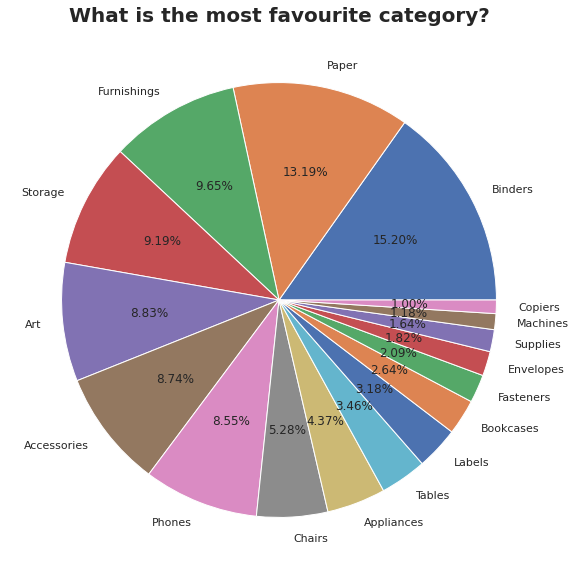

In [62]:
plt.figure(figsize = (16,10))
plt.title('What is the most favourite category?', weight = 'heavy',size = 20)

plt.pie(data, labels = data.index, autopct = '%.2f%%')
plt.show()

# № 5: Who was the best seller by profit? Top 10

In [63]:
sub.head()

,order_id,order_date,ship_date,customer_name,country,city,state,category,product_name,sales,quantity,profit,month_order,season,year_order
0,US-2014-109484,2014-07-11,2014-11-13,Roger Barcio,United States,Portland,Oregon,Binders,Flexible Leather- Look Classic Collection Ring...,5.68,1.0,-3.79,11,autumn,2014
1,CA-2014-157833,2014-06-18,2014-06-21,Katherine Ducich,United States,San Francisco,California,Binders,Trimflex Flexible Post Binders,51.31,3.0,17.96,6,summer,2014
2,US-2014-107272,2014-06-11,2014-11-13,Troy Staebel,United States,Phoenix,Arizona,Binders,"Avery Durable Slant Ring Binders, No Labels",2.39,2.0,-1.83,11,autumn,2014
3,US-2014-107272,2014-06-11,2014-11-13,Troy Staebel,United States,Phoenix,Arizona,Storage,"Trav-L-File Heavy-Duty Shuttle II, Black",243.99,7.0,30.50,11,autumn,2014
4,CA-2014-106180,2014-09-19,2014-09-24,Sally Hughsby,United States,San Francisco,California,Art,Newell 343,8.82,3.0,2.38,9,autumn,2014


In [68]:
data =sub.groupby(by = 'customer_name', as_index = False)['profit'].sum() \
   .head(10) \
   .sort_values(by = 'profit', ascending = False)

Text(0.5, 1.0, 'Who was the best seller in 2014?')

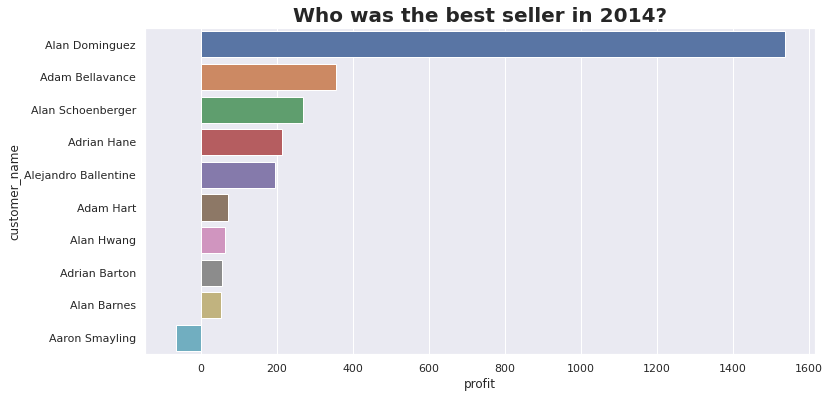

In [71]:
plt.figure(figsize = (12,6))

sns.barplot(data = data,
             x = 'profit',
             y = 'customer_name'
             )

plt.title('Who was the best seller in 2014?', size = 20, weight = 'heavy')



# № 6: For what number of days is the product delivered?

In [73]:
sub.head()

,order_id,order_date,ship_date,customer_name,country,city,state,category,product_name,sales,quantity,profit,month_order,season,year_order
0,US-2014-109484,2014-07-11,2014-11-13,Roger Barcio,United States,Portland,Oregon,Binders,Flexible Leather- Look Classic Collection Ring...,5.68,1.0,-3.79,11,autumn,2014
1,CA-2014-157833,2014-06-18,2014-06-21,Katherine Ducich,United States,San Francisco,California,Binders,Trimflex Flexible Post Binders,51.31,3.0,17.96,6,summer,2014
2,US-2014-107272,2014-06-11,2014-11-13,Troy Staebel,United States,Phoenix,Arizona,Binders,"Avery Durable Slant Ring Binders, No Labels",2.39,2.0,-1.83,11,autumn,2014
3,US-2014-107272,2014-06-11,2014-11-13,Troy Staebel,United States,Phoenix,Arizona,Storage,"Trav-L-File Heavy-Duty Shuttle II, Black",243.99,7.0,30.50,11,autumn,2014
4,CA-2014-106180,2014-09-19,2014-09-24,Sally Hughsby,United States,San Francisco,California,Art,Newell 343,8.82,3.0,2.38,9,autumn,2014


In [76]:
sub['date_diff'] = sub['ship_date'] - sub['order_date']

In [78]:
sub.head()

,order_id,order_date,ship_date,customer_name,country,city,state,category,product_name,sales,quantity,profit,month_order,season,year_order,date_diff
0,US-2014-109484,2014-07-11,2014-11-13,Roger Barcio,United States,Portland,Oregon,Binders,Flexible Leather- Look Classic Collection Ring...,5.68,1.0,-3.79,11,autumn,2014,125 days
1,CA-2014-157833,2014-06-18,2014-06-21,Katherine Ducich,United States,San Francisco,California,Binders,Trimflex Flexible Post Binders,51.31,3.0,17.96,6,summer,2014,3 days
2,US-2014-107272,2014-06-11,2014-11-13,Troy Staebel,United States,Phoenix,Arizona,Binders,"Avery Durable Slant Ring Binders, No Labels",2.39,2.0,-1.83,11,autumn,2014,155 days
3,US-2014-107272,2014-06-11,2014-11-13,Troy Staebel,United States,Phoenix,Arizona,Storage,"Trav-L-File Heavy-Duty Shuttle II, Black",243.99,7.0,30.50,11,autumn,2014,155 days
4,CA-2014-106180,2014-09-19,2014-09-24,Sally Hughsby,United States,San Francisco,California,Art,Newell 343,8.82,3.0,2.38,9,autumn,2014,5 days


In [85]:
sub.date_diff.mean() #in average delivery time was ~12 days

Timedelta('12 days 23:22:00.109190172')

In [87]:
sub.date_diff.describe().transpose()

count                          1099
mean     12 days 23:22:00.109190172
std      90 days 19:37:03.220505560
min             -317 days +00:00:00
25%                 2 days 00:00:00
50%                 4 days 00:00:00
75%                61 days 00:00:00
max               214 days 00:00:00
Name: date_diff, dtype: object

However, as we can all see it was a mistake that in average delivery time was 12 days, because as we have a look at .describe, we might see that 50% was 4 days.

Also it is very essiantial to see that we have perhaps some ejections in our dataset, min time diff was -317 days that is physically impossible. 

So it is better to say that in average delivery time was **4** days.

Be careful with mean functions! :)

In [95]:
sub['int_date_diff'] = sub['date_diff'].astype('str') \
                                       .str.strip('days')\
                                       .astype('int')

<Axes: >

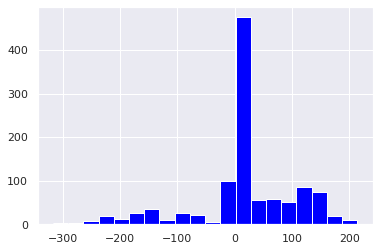

In [97]:
sub['int_date_diff'].hist(bins = 20,color = 'blue')

The histogram shows us that we have some values lower than 0, why? Perhaps, let's just exclude values that are lower than 0, and calculate mean and 50% again!

In [99]:
sub_a = sub[sub['int_date_diff'] > 0].copy()

In [100]:
sub_a['int_date_diff'].describe().transpose()

count    858.000000
mean      46.031469
std       58.882655
min        1.000000
25%        4.000000
50%        6.000000
75%       92.000000
max      214.000000
Name: int_date_diff, dtype: float64